<a href="https://colab.research.google.com/github/sazio/NMAs/blob/main/EDA_Stringer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading of Stringer spontaneous data

includes some visualizations

In [1]:
#@title Data retrieval
import os, requests

fname = "stringer_spontaneous.npy"
url = "https://osf.io/dpqaj/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [2]:
#@title Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [3]:
#@title Data loading
import numpy as np
dat = np.load('stringer_spontaneous.npy', allow_pickle=True).item()
print(dat.keys())

dict_keys(['sresp', 'run', 'beh_svd_time', 'beh_svd_mask', 'stat', 'pupilArea', 'pupilCOM', 'xyz'])



dat has fields:
* `dat['sresp']`: neurons by timebins, a.k.a. the neural response data (11983 by 7018). Timebin = 1.2 sec.
* `dat['run']`: timebins by 1, a.k.a. the running speed of the animal in a.u.
* `dat['xyz']`: three-dimensional position of each neuron in the brain. 
* `dat['pupilArea']`: timebins by 1, see FaceMap for details on the pupil tracker
* `dat['pupilCOM']`: timebins by 2, correspond to X and Y position. See FaceMap for details on the pupil tracker.
* `dat['beh_svd_time']`: timebins by 1,000. Timecourses of behavioral SVDs extracted from face movies. See FaceMap for details. 
* `dat['beh_svd_mask']`: 240 by 320 by 1,000. Spatial masks of behavioral SVDs. Roughly normalized to each other. 
* `dat['beh_svd_mask'] @ dat['beh_svd_time'][T, :]`:  reconstruction of the face movie (its motion energy) for frame T
* `dat['stat']`: 1 by neurons, some statistics for each neuron, see Suite2p for full documentation.

In [4]:
print(dat['sresp'].shape)
print(len(dat['stat']))

(11983, 7018)
11983


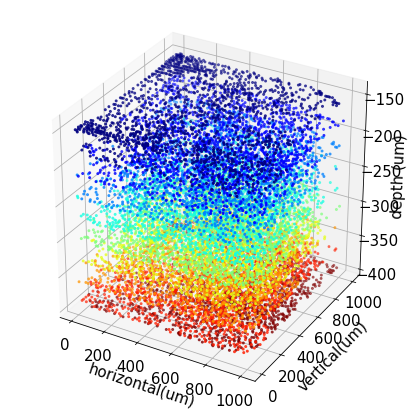

In [5]:
# @title plot the 3D positions of all neurons
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x, y, z = dat['xyz']

zunq, iunq = np.unique(z, return_inverse=True)
xc = np.linspace(0.0, 1.0, len(zunq))
cmap = cm.get_cmap('jet')(xc)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[::-1],y[::-1],z[::-1], 'o', s = 4, c = cmap[iunq])
ax.set(xlabel='horizontal(um)', ylabel = 'vertical(um)', zlabel='depth (um)');

In [6]:
print("Number of layers: " + str(np.unique(z).shape[0]))

Number of layers: 9


In [18]:
# Extract labels from z - coordinate
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels = le.fit_transform(z)

In [31]:
### Data for LFADS 
import pandas as pd 
dataSet = pd.DataFrame(dat["sresp"])
#dataSet["label"] = labels 

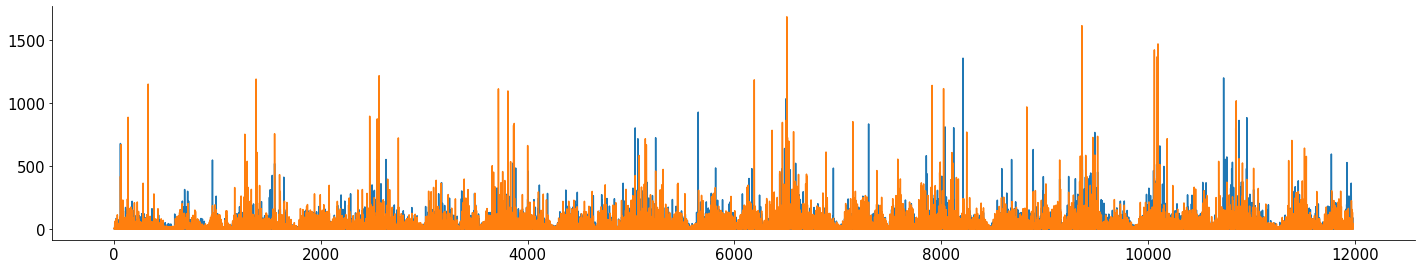

In [7]:
# two different neurons activity
plt.plot(dat["sresp"][:,0])
plt.plot(dat["sresp"][:,1])

## PCA - Signal Dimensionality Reduction 

In [105]:
from sklearn.decomposition import PCA
from scipy.stats import zscore
Z = zscore(dat['sresp'], axis=1)
Z = np.nan_to_num(Z)
#X = PCA(n_components = 200).fit_transform(Z)

In [118]:
N = 5
padded_Z = np.hstack((Z, np.zeros((Z.shape[0], 2))))
red_Z = padded_Z.reshape((padded_Z.shape[0], int(padded_Z.shape[1]/N), N))
red_Z = np.mean(red_Z, axis = 2)

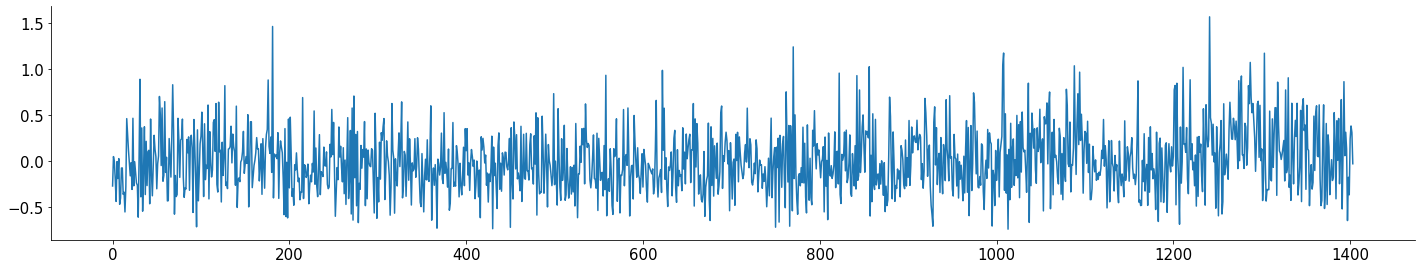

In [119]:
plt.plot(red_Z[0,:])

In [120]:
#pca = PCA(n_components = red_Z.shape[1]).fit(red_Z)
pca = PCA(n_components = 300).fit(red_Z)

In [121]:
pca_Z = pca.transform(red_Z)

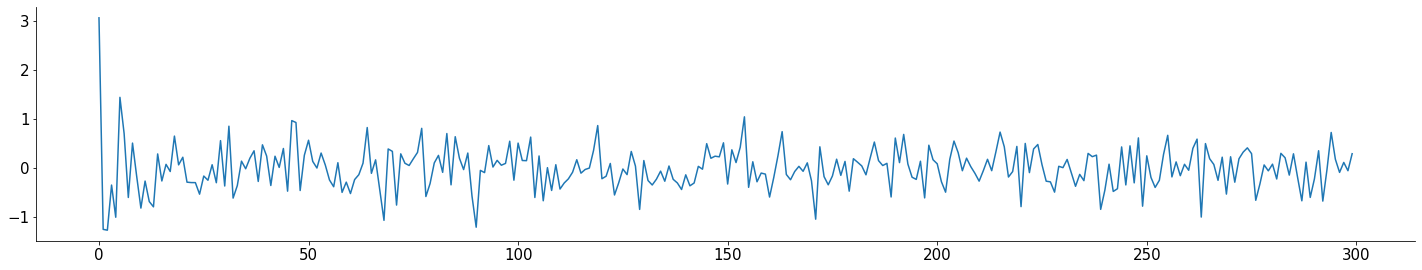

In [124]:
plt.plot(pca_Z[0,:])

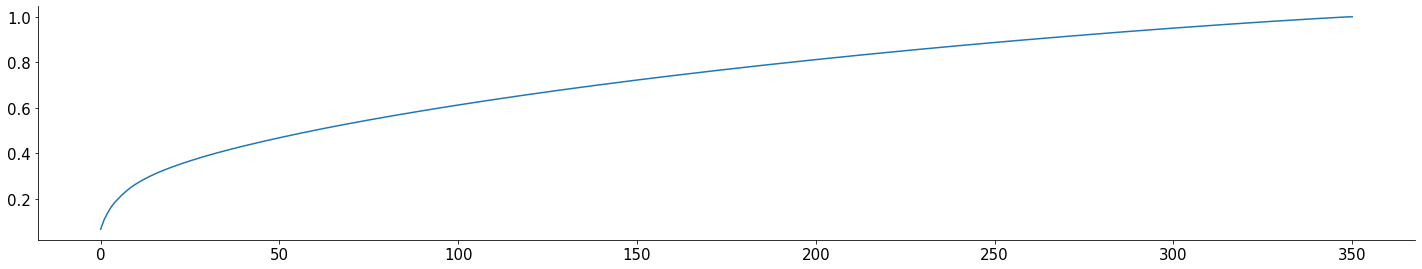

In [116]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

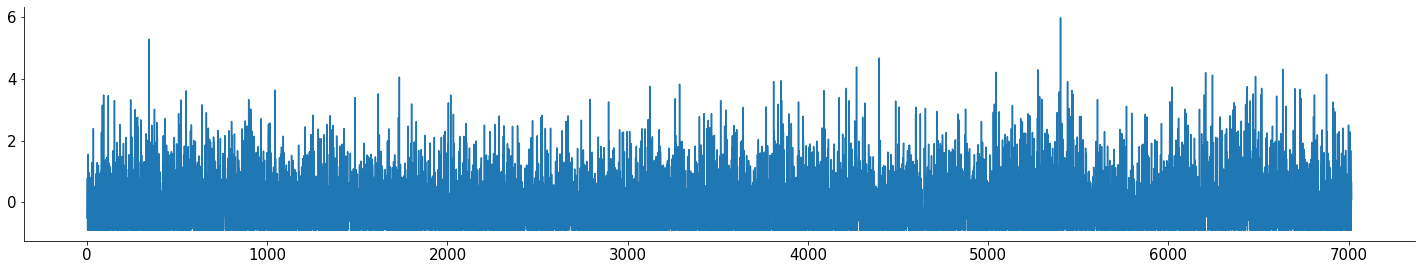

In [60]:
plt.plot(red_Z[0,:])

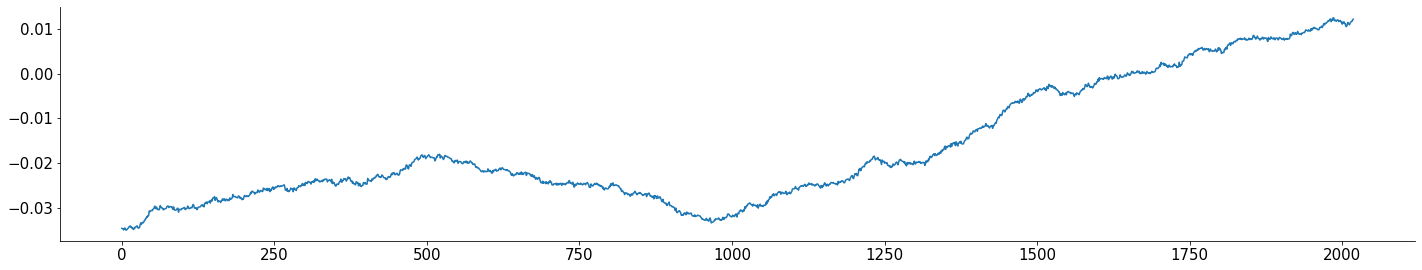

In [73]:
plt.plot()